In [3]:
import numpy as np
import pandas as pd
import os
import json
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Day 5

## Pandas DataFrame

In [4]:
#用字典建立
data = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitor': [139, 237, 326, 456]}
vis_1 = pd.DataFrame(data)
vis_1.head()

,weekday,city,visitor
0,Sun,Austin,139
1,Sun,Dallas,237
2,Mon,Austin,326
3,Mon,Dallas,456


In [5]:
#用字串建立
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
visitors = [139, 237, 326, 456]

list_labels = ['city', 'weekday', 'visitor']
list_cols = [cities, weekdays, visitors]

zipped = list(zip(list_labels, list_cols))
vis_2 = pd.DataFrame(dict(zipped))
vis_2.head()

,city,weekday,visitor
0,Austin,Sun,139
1,Dallas,Sun,237
2,Austin,Mon,326
3,Dallas,Mon,456


In [6]:
vis_1.groupby(by="weekday")['visitor'].mean()

weekday
Mon    391
Sun    188
Name: visitor, dtype: int64

In [7]:
vis_1.groupby(by="weekday")['visitor'].sum()

weekday
Mon    782
Sun    376
Name: visitor, dtype: int64

In [8]:
vis_1.groupby(by="weekday")['visitor'].std()

weekday
Mon    91.923882
Sun    69.296465
Name: visitor, dtype: float64

In [9]:
vis_1.groupby(by="weekday")['visitor'].max()

weekday
Mon    456
Sun    237
Name: visitor, dtype: int64

In [10]:
vis_1.groupby(by="weekday")['visitor'].min()

weekday
Mon    326
Sun    139
Name: visitor, dtype: int64

In [11]:
vis_1.groupby(by="weekday")['visitor'].median()

weekday
Mon    391
Sun    188
Name: visitor, dtype: int64

In [12]:
vis_1.groupby(by="weekday")['visitor'].var()

weekday
Mon    8450
Sun    4802
Name: visitor, dtype: int64

## Pandas Data Loading

## .txt

In [13]:
import pandas as pd

data = []
with open("data/example.txt", 'r') as f:
    for line in f:
        line = line.replace('\n', '').split(',') # 將每句最後的 /n 取代成空值後，再以逗號斷句
        data.append(line)
data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

In [14]:
df = pd.DataFrame(data[1:])
df.columns = data[0]
df

,id,sex,age,score
0,001,F,20,77
1,002,F,25,90
2,003,M,22,80
3,004,F,30,66
4,005,M,40,60
5,006,M,29,87


## .json

In [15]:
with open('data/example01.json', 'r') as f:
    j1 = json.load(f)
type(j1)

dict

In [16]:
df = pd.DataFrame(j1)
df

,id,sex,age,score
0,001,F,20,77
1,002,F,25,90
2,003,M,22,80
3,004,F,30,66
4,005,M,40,60
5,006,M,29,87


## .npy

In [17]:
array = np.array(data[1:])
array

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

In [18]:
df = pd.DataFrame(array)
df.columns = ['id','sex','age','score']
df.set_index('id',inplace=True)
df

,sex,age,score
id,,,
001,F,20,77
002,F,25,90
003,M,22,80
004,F,30,66
005,M,40,60
006,M,29,87


## .pkl

In [19]:
with open('data/example.pkl', 'wb') as f:
    pkl_data = pickle.dump(file=f, obj=data)
pkl_data

In [20]:
with open('data/example.pkl', 'rb') as f:
    pkl_data = pickle.load(f)
pkl_data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

In [21]:
df = pd.DataFrame(pkl_data[1:])
df.columns = pkl_data[0]
df

,id,sex,age,score
0,001,F,20,77
1,002,F,25,90
2,003,M,22,80
3,004,F,30,66
4,005,M,40,60
5,006,M,29,87


## 圖片讀取

## skimage.io

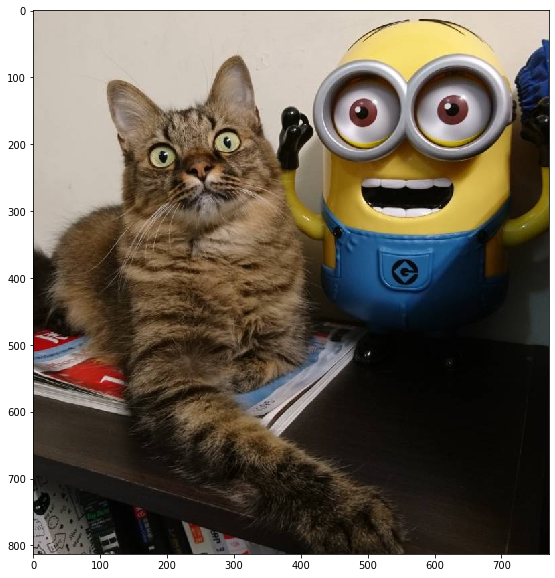

In [22]:
import skimage.io as skio
img_1 = skio.imread('./data/example.jpg')
plt.figure(figsize=(10,10))
plt.imshow(img_1)
plt.show()

## Image

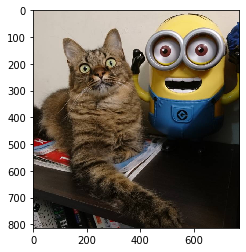

In [23]:
from PIL import Image
img_2 = Image.open('./data/example.jpg')
img_2 = np.array(img_2)
plt.imshow(img_2)
plt.show()

## OpenCV

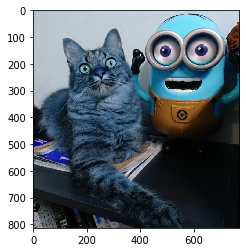

In [24]:
import cv2
img_3 = cv2.imread('./data/example.jpg')
plt.imshow(img_3)
plt.show()

#### OPENCV內建色調不是RGB是CMYK，所以要調整

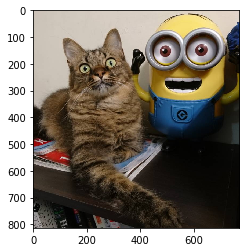

In [25]:
img_3 = cv2.cvtColor(img_3,cv2.COLOR_BGR2RGB)
plt.imshow(img_3)
plt.show()

## 存成矩陣檔在讀取

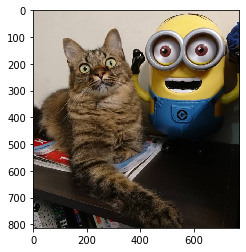

In [26]:
import scipy.io as sio
mat_arr = sio.loadmat('./data/example.mat')


plt.imshow(mat_arr['img'])
plt.show()


# Day 6

## 利用os開啟資料，並且整理成需要的樣子

In [27]:
path = './data/'
file_app_train = os.path.join(path,'application_train.csv')
file_app_test = os.path.join(path,'application_test.csv')
app_train = pd.read_csv(file_app_train)
app_test = pd.read_csv(file_app_test)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 檢查dataFrame中各類型欄位各有幾個

In [31]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [35]:
app_train.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### 在確認完資料以後要進行標籤(labeling)以利後續進行supervised learning

### Label encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

# 呼叫Label Encoding的工具
Le = LabelEncoder()
Le_count = 0 #設定Label Encoding的初始值
#進行DataFrame裡面object的label encoding
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique()))<=2:
            Le.fit(app_train[col])
            app_train[col] = Le.transform(app_train[col])
            app_test[col] = Le.transform(app_test[col])
            Le_count += 1
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### One Hot encoding

In [46]:
#pandas內就有內建one hot encoding
app_train = pd.get_dummies(app_train)
app_train['CODE_GENDER_F'].head(20)

0     0
1     1
2     0
3     1
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    1
15    0
16    0
17    1
18    1
19    1
Name: CODE_GENDER_F, dtype: uint8

In [47]:
app_train['CODE_GENDER_M'].head(20)

0     1
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     0
9     1
10    0
11    0
12    0
13    1
14    0
15    1
16    1
17    0
18    0
19    0
Name: CODE_GENDER_M, dtype: uint8

In [48]:
app_train = pd.read_csv(file_app_train)
sub_train = pd.DataFrame(app_train['WEEKDAY_APPR_PROCESS_START'])
print(sub_train.shape)
sub_train.head()

(307511, 1)


,WEEKDAY_APPR_PROCESS_START
0,WEDNESDAY
1,MONDAY
2,MONDAY
3,WEDNESDAY
4,THURSDAY


In [51]:
df_train = pd.get_dummies(sub_train)
df_train.head()

,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0


# Day 7

### 當拿到一筆Raw Data的時候，應該先將資料整理過，並且進行初步的資料判定及閱讀，進而找到目標資料，並藉由資料分析找到對比有關係的資料，首先是資料分析，在來將資料分成Train_X及結果Train_Y，然後閱讀資料的意義，分析資料內容類行為何，再將資料進行labeling

In [52]:
df_train = pd.read_csv(path+'house_train.csv.gz')
df_test = pd.read_csv(path+'house_test.csv.gz')
df_train.shape

(1460, 81)

In [55]:
df_test.shape

(1459, 80)

In [53]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [69]:
data = df_train['SalePrice']
data_index = df_train.index


RangeIndex(start=0, stop=1460, step=1)
